# Logistic Regression

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
import pandas as pd

In [140]:
class LogisticRegression:
    def __init__(self, X, learning_rate=0.1, num_iters=10000):
        self.lr = learning_rate
        self.num_iters = num_iters

        # m for #training_examples, n for #features
        self.m, self.n = X.shape

    def train(self, X, y):
        # init weights
        self.weights = np.zeros((self.n, 1))
        self.bias = 0

        for it in range(self.num_iters + 1):
            # calculate hypothesis
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # calculate cost
            cost = (
                -1
                / self.m
                * np.sum(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
            )

            # back prop / gradient calculations
            dw = 1 / self.m * np.dot(X.T, (y_predict - y))
            db = 1 / self.m * np.sum(y_predict - y)

            # gradient descent update step
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # print cost sometimes
            if it % 1000 == 0:
                print(f"Cost after iteration {it}: {cost}")

        return self.weights, self.bias

    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = y_predict > 0.5

        return y_predict_labels

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [141]:
np.random.seed(1)
X, y = make_blobs(n_samples=1000, centers=2)
y = y[:, np.newaxis]

logreg = LogisticRegression(X)
w, b = logreg.train(X, y)
y_predict = logreg.predict(X)

print(f"Accuracy: {np.sum(y==y_predict)/X.shape[0]}")

Cost after iteration 0: 0.6931471805599454
Cost after iteration 1000: 0.0011600933459921785
Cost after iteration 2000: 0.0006491300880665668
Cost after iteration 3000: 0.000462485964887221
Cost after iteration 4000: 0.0003635915165060212
Cost after iteration 5000: 0.0003016459230941666
Cost after iteration 6000: 0.00025890699961499065
Cost after iteration 7000: 0.00022749458542860117
Cost after iteration 8000: 0.00020335181473262736
Cost after iteration 9000: 0.0001841682130989886
Cost after iteration 10000: 0.00016852716747729746
Accuracy: 1.0


Breast classifier using Logistic Regression

In [142]:
data = pd.read_csv('Datasets/breast-cancer.csv')

In [143]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
data.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [145]:
data.drop(['id'], axis=1, inplace=True) #inplace=True means that the changes are saved to the df right away
data.head() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [146]:
data.value_counts('diagnosis')

diagnosis
B    357
M    212
Name: count, dtype: int64

In [147]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
data.value_counts('diagnosis')

diagnosis
0    357
1    212
Name: count, dtype: int64

In [149]:
X= data.drop(['diagnosis'], axis=1).to_numpy() #X is the input data
y= data['diagnosis'].values #values converts the df to a numpy array

In [150]:
X.shape, y.shape

((569, 30), (569,))

In [151]:
X = np.c_[np.ones(len(X)), X] #add a column of ones to X

In [152]:
X.shape

(569, 31)

In [153]:
X = X.T #transpose X

In [154]:
X.shape

(31, 569)

Sigmoid Hypothesis

In [155]:
def compute_hypothesis(params, X):
    z = np.matmul(params.T, X)
    prediction = 1 / (1 + np.exp(-z))
    return prediction

Predict Classes

In [156]:
def predict_classes(prediction):
    predictions = np.zeros(prediction.shape)
    predictions[prediction >= 0.5] = 1
    predictions[prediction < 0.5] = 0
    return predictions

Cost Function

In [157]:
def compute_cost(prediction, actual):
    epsilon = 1e-10  # Small value to prevent log(0)
    prediction = np.clip(prediction, epsilon, 1 - epsilon)  # Ensure predictions are in (0,1)
    
    m = len(actual)
    log_of_prediction = np.log(prediction)
    log_of_one_minus_prediction = np.log(1 - prediction)
    
    cost = (-1 / m) * np.sum(actual * log_of_prediction + (1 - actual) * log_of_one_minus_prediction)
    return cost

Calculate Accuracy

In [158]:
def calculate_accuracy(class_predictions, actual):
    accuracy = sum(class_predictions==actual)/len(actual)
    return accuracy

Gradient Descent

In [159]:
def gradient_descent(X, y, learning_rate, num_iters):
    actual = y
    cost = []
    accuracies = []
    params = np.zeros(X.shape[0])
    m = len(actual)
    for i in range(num_iters):
        predictions = compute_hypothesis(params, X)
        class_prediction = predict_classes(predictions)
        accuracies.append(calculate_accuracy(class_prediction, actual))
        cost.append(compute_cost(predictions, actual))
        errors = predictions - actual
        gradients = (1/m)*np.matmul(X, errors)
        params = params - (learning_rate*gradients)
    return params, cost, accuracies

Verification

In [160]:
params = np.zeros(X.shape[0])
predictions = compute_hypothesis(params, X)
len(predictions)

569

In [161]:
cost = compute_cost(predictions, y)
cost

np.float64(0.6931471805599453)

In [162]:
learning_rate = 0.0001
errors = predictions - y
gradients = (1/len(y))*np.matmul(X, errors)
params = params - (learning_rate*gradients)
len(gradients), len(params)

(31, 31)

Final Joint Logical Regression

In [163]:
learning_rate = 0.0000001
iterations = 1000
params, cost, accuracies = gradient_descent(X, y, learning_rate, iterations)

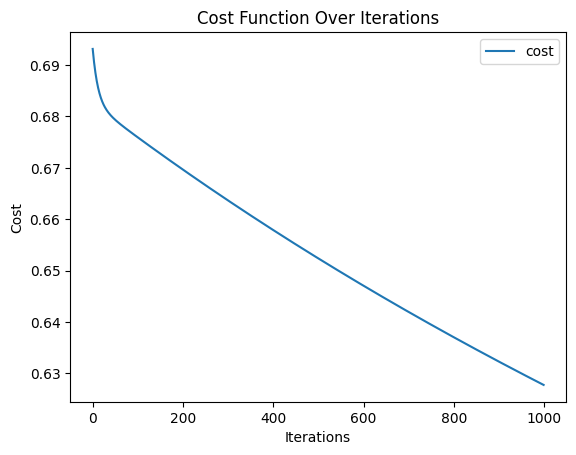

In [164]:
plt.plot(np.arange(len(cost)), cost, label='cost')  # Fixed np.arange
plt.legend(loc='upper right')  # Fixed plt.legend
plt.xlabel('Iterations')  # Optional: Add x-axis label
plt.ylabel('Cost')  # Optional: Add y-axis label
plt.title('Cost Function Over Iterations')  # Optional: Add title
plt.show()

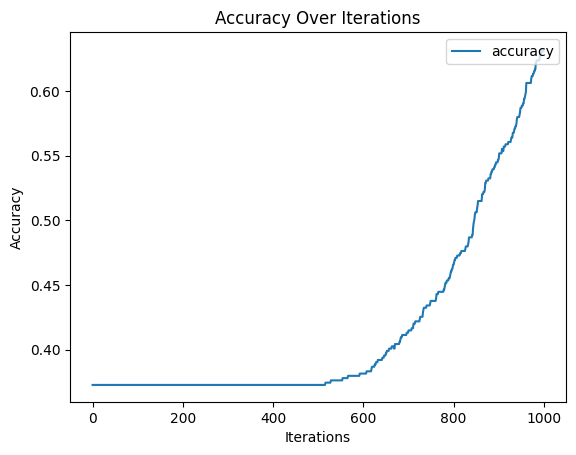

In [165]:
plt.plot(np.arange(len(accuracies)), accuracies, label='accuracy')  # Fixed np.arange
plt.legend(loc='upper right')  # Fixed plt.legend
plt.xlabel('Iterations')  # Optional: Add x-axis label
plt.ylabel('Accuracy')  # Optional: Add y-axis label
plt.title('Accuracy Over Iterations')  # Optional: Add title
plt.show()

In [166]:
accuracies[-1]

np.float64(0.6309314586994728)